# Consistency Check

In this notebook we check noise-parameter using Normalized Innovation Squared (NIS)

$$
\epsilon = (z_k - z_{k|k-1})^T\cdot S_{k|k-1}^{-1} \cdot (z_k - z_{k|k-1})
$$

In the code, we print NIS to stdout and redirect it to `run.csv`.

First let load our lidar/radar NIS

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

run_log = pd.read_csv('run2.csv', names=['type', 'nis'], delim_whitespace=True)

lidar_nis = run_log[run_log['type'] == 'lidar_nis']['nis'].values
radar_nis = run_log[run_log['type'] == 'radar_nis']['nis'].values

We know that lidar-nis  $\sim \chi^2(df=2)$ and radar-nis $\sim\chi^2(df=3)$, looking at $\chi^2$ table at [here](https://www.medcalc.org/manual/chi-square-table.php), we have the 95% upper-bound for
* lidar-nis: 5.991
* radar-nis: 7.815

Let's visualize it

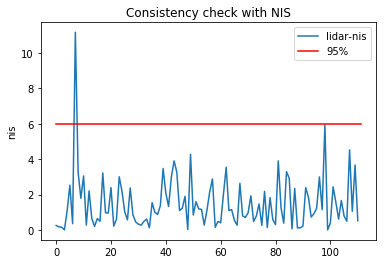

In [28]:
def plot_nis(nis, upper_bound, label = None):
    x = range(len(nis))
    plt.plot(x, nis, label = label)
    plt.plot(x, [upper_bound] * len(nis), label = '95%', color='r')
    plt.ylabel('nis')
    plt.title('Consistency check with NIS')
    plt.legend()
    
plot_nis(lidar_nis, 5.991, label = 'lidar-nis')

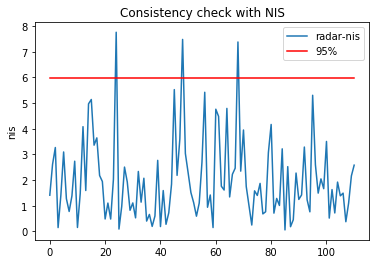

In [29]:
plot_nis(radar_nis[1:], 5.991, label = 'radar-nis')